In [3]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=cb5e378d4737ba706e9804cc639a188110021af088a08f93e516506400b935e9
  Stored in directory: /tmp/pip-ephem-wheel-cache-cwjlbrpl/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [4]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf

from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Get a sample stock price from 2019-01-01 to today

In [5]:
# Get the data of the Apple stock (code AAPL)
data = yf.download('AAPL','2019-01-01','2020-04-30')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300


### Extract the Close price column to plot

In [6]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()
df.isna().values.any() # check for NaN

False

In [7]:
df.head()

,Date,Close
0,2019-01-02,157.919998
1,2019-01-03,142.190002
2,2019-01-04,148.259995
3,2019-01-07,147.929993
4,2019-01-08,150.750000


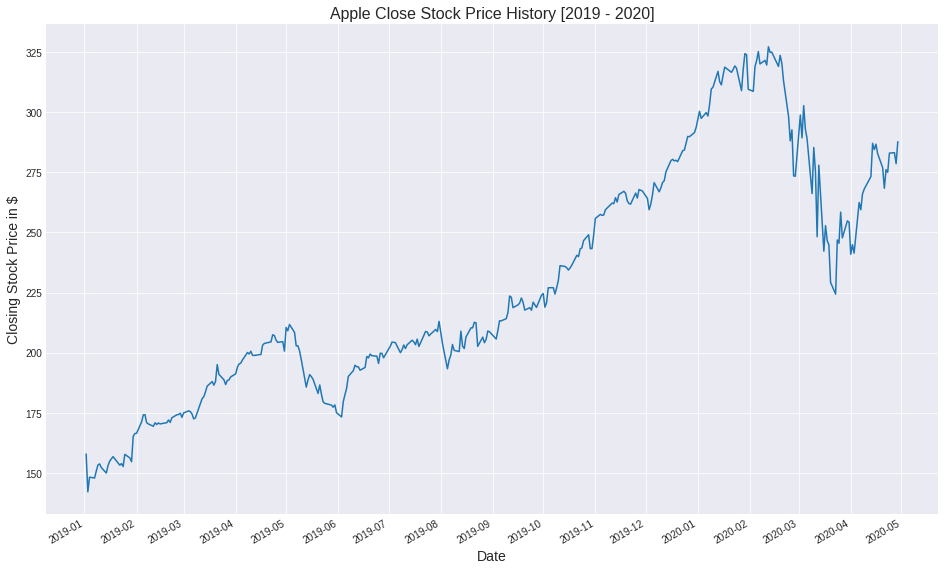

In [8]:
# Import matplotlib package for date plots

months = mdates.MonthLocator() # Get every year
dateFmt = mdates.DateFormatter('%Y-%m') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)

# Set figure title
plt.title('Apple Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

### Get stock of Apple, Google, Microsoft, Amazon, Facebook via Yahoo Finance

In [10]:
def get_close_stock_price(codes, start_date='2019-01-01', end_date='2020-04-30'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df

df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])
df.to_csv('data/close_price_big_5.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
df = pd.read_csv('data/close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2019-01-02,157.919998,1054.680054,101.120003,1539.130005,135.679993
2019-01-03,142.190002,1025.469971,97.400002,1500.280029,131.740005
2019-01-04,148.259995,1078.069946,101.930000,1575.390015,137.949997
2019-01-07,147.929993,1075.920044,102.059998,1629.510010,138.050003
2019-01-08,150.750000,1085.369995,102.800003,1656.579956,142.529999


In [12]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-27',
               '2020-04-28', '2020-04-29'],
              dtype='datetime64[ns]', name='Date', length=334, freq=None)

In [13]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

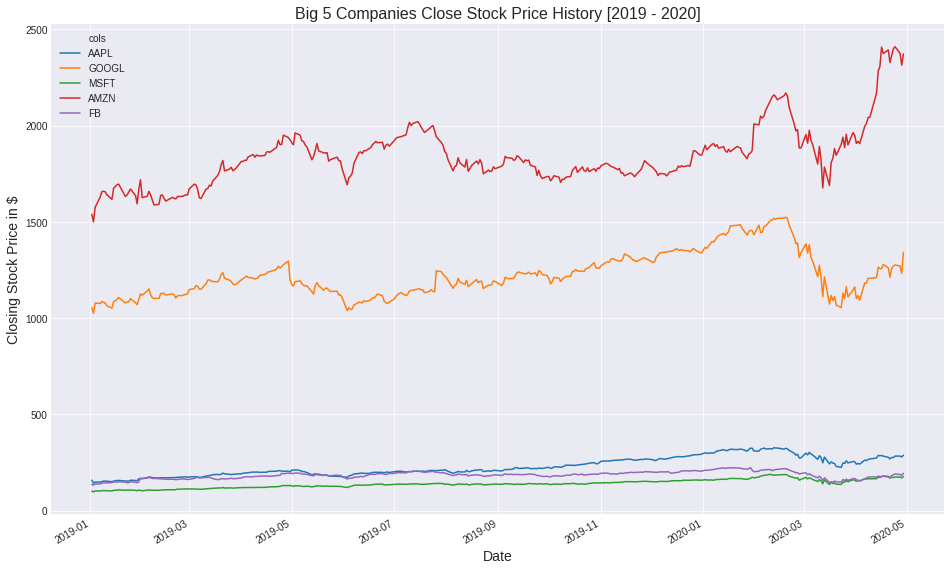

In [14]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

####2. Investigate if stock price of Big 5 companies are related to each other ( “FAAMG”—Facebook, Amazon, Apple, Microsoft, and Google )

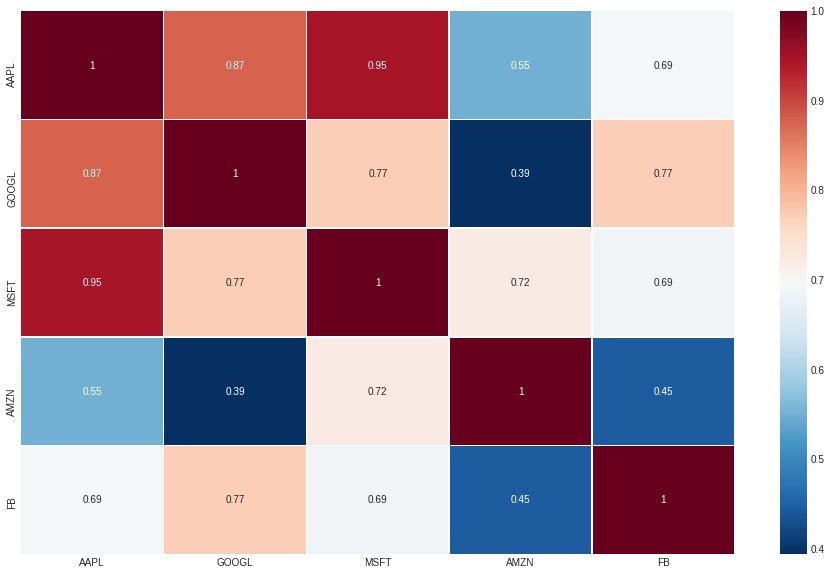

In [15]:
pearsoncorr = df.corr(method='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

####3. Determine the features that could predict future stock price ( stock price from Yahoo Finance could be considered as raw features, create new features if needed )

In [120]:
def get_close_stock_price(codes, start_date='2019-01-01', end_date='2020-04-30'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df

df = get_close_stock_price(['AAPL'])#'AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'
df.to_csv('data/close_price_big_5.csv')

[*********************100%***********************]  1 of 1 completed


In [121]:
len(df)/5

66.8

### Create X, y matrices for regression
Use history = number of days before prediction date

In [0]:
import math
def create_features(df, history=1): #overlap on X
  X,y = [], []
  for row_idx in range(history, len(df)):
    past_price = df.iloc[row_idx-history:row_idx,:].values.reshape(-1)
    
    max_of_stock = np.max(past_price)

    min_of_stock = np.min(past_price)

    average_of_stock = np.mean(past_price)

    standard_deviation_of_stock = math.sqrt((1/history)*np.sum(np.power(past_price-np.mean(past_price),2)))

    #mean_pct_return_of_stock = np.mean(df.iloc[row_idx-history:row_idx,:].pct_change().fillna(0).values.reshape(-1))
    temp = df.iloc[row_idx-history:row_idx,:]
    divided_between_2days_df = temp/temp.shift(periods=1).fillna(temp.iloc[0]) #price of today / price of previous day
    mean_log_return_of_stock = np.mean(np.log(divided_between_2days_df.values.reshape(-1)))

    y.append( df.iloc[row_idx,:].values.reshape(-1) )
    X.append(np.array([max_of_stock, min_of_stock, average_of_stock, standard_deviation_of_stock, mean_log_return_of_stock]))
  
  X = np.array(X)
  y = np.array(y)
  return X,y

In [0]:
import math

def create_features2(df, history=1):  #no overlapping on X
  X,y = [], []
  for row_idx in range(0, math.floor(len(df)/(history+1))):
    df_cluster = df.iloc[row_idx*(history+1):(row_idx+1)*(history+1), :]
    past_price = df_cluster.iloc[:history,:].values.reshape(-1)
    next_price = df_cluster.iloc[-1,:].values.reshape(-1)

    max_of_stock = np.max(past_price)
    
    min_of_stock = np.min(past_price)
    
    average_of_stock = np.mean(past_price)
    
    standard_deviation_of_stock = math.sqrt((1/history)*np.sum(np.power(past_price-np.mean(past_price),2)))
    
    #mean_pct_return_of_stock = np.mean(df_cluster.pct_change().fillna(0).values.reshape(-1))
    
    divided_between_2days_df = df_cluster/df_cluster.shift(periods=1).fillna(df_cluster.iloc[0]) #price of today / price of previous day
    mean_log_return_of_stock = np.mean(np.log(divided_between_2days_df.values.reshape(-1)))
    
    y.append( next_price )
    X.append(np.array([max_of_stock, min_of_stock, average_of_stock, standard_deviation_of_stock, mean_log_return_of_stock]))
  
  X = np.array(X)
  y = np.array(y)
  return X,y

In [0]:
X,y = create_features2(df,history=3) #Currently, history of 3 gives best performance
#Therefore, wait for 3 days before go all in for stock. It's risky

In [125]:
X.shape

(83, 5)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
transform_X = scaler.transform(X)

In [127]:
from sklearn.model_selection import train_test_split
n_train = len(y) * 7 // 10
print(n_train)
X_train, y_train, X_test, y_test = transform_X[:n_train], y[:n_train], transform_X[n_train:], y[n_train:]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

58


### Create a Linear Regression Model to predict stock price

In [0]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [129]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE = ", mean_squared_error(y_test, ypred))
print("R2 = ", r2_score(y_test, ypred))

MSE =  20.316063874575626
R2 =  0.9716505521320643


In [130]:
y_test.shape

(25, 1)

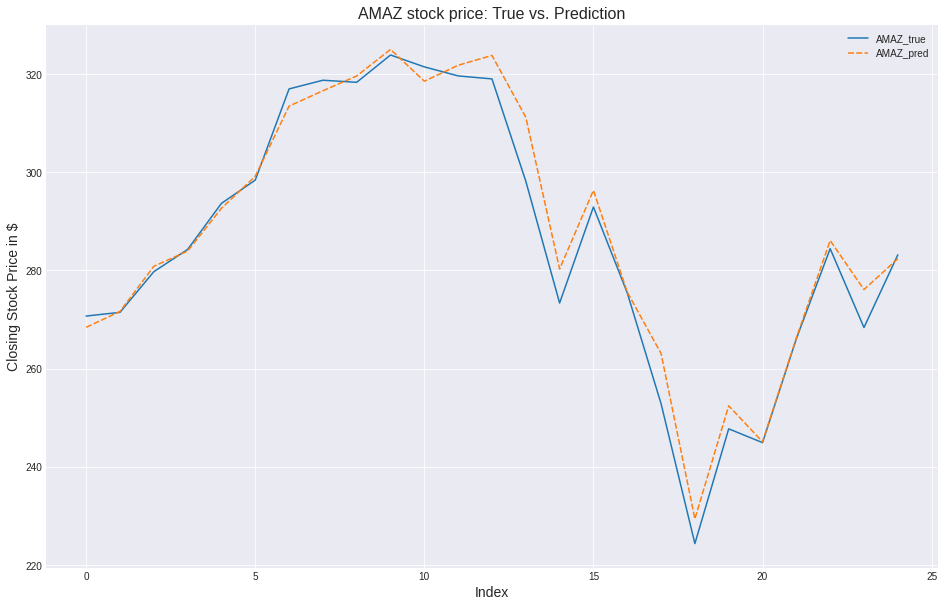

In [131]:
df_plot = pd.DataFrame({"AMAZ_true": y_test[:,0], 'AMAZ_pred': ypred[:,0]}, index=range(0,y_test.shape[0]))

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

plt.title('AMAZ stock price: True vs. Prediction', fontsize=16)

plt.xlabel('Index', fontsize=14)

plt.ylabel('Closing Stock Price in $', fontsize=14)

plt.show()